 # **Fashion MNIST** 


<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Danish Javaid Meo</h1>


[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](danishjmeo@gmail.com)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/danishjmeo)
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/danishmeo9) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/danish-javaid-4271a8231/)  

 <h1><center><font size="6">Fashion MNIST</font></center></h1>


<center><img src="https://research.zalando.com/project/fashion_mnist/fashion_mnist/img/fashion-mnist-sprite.png" width="600"></img></center>

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

## Dataset Details

- **Total Images**: 70,000
  - **Training Set**: 60,000 images
  - **Test Set**: 10,000 images
- **Image Dimensions**: 28x28 pixels
- **Color Mode**: Grayscale
- **Number of Classes**: 10

## Labels

Each training and test example is assigned to one of the following labels:

| Label | Description  |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Bag          |
| 9     | Ankle boot   |


In [14]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

In [15]:
(train_images, train_labels ),(test_images, test_labels)= fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)
# assert function do not raise an error and uses for 

In [16]:
# Summarize load datset
print('Train:X=%s,y=%s' % (X_train.shape, y_train.shape))
print('Test:X=%s,y=%s' % (X_test.shape, y_test.shape))

Train:X=(60000, 28, 28),y=(60000,)
Test:X=(10000, 28, 28),y=(10000,)


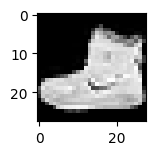

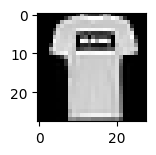

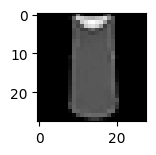

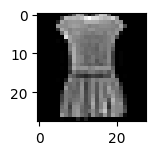

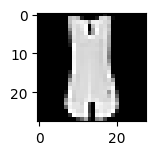

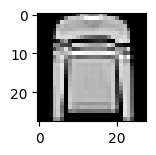

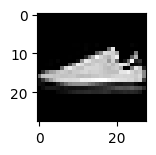

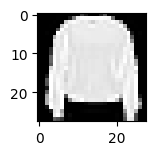

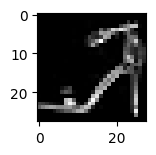

In [17]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330+1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()

In [18]:
# pre process the data
X_train=X_train/255.0
X_test=X_test/255.0

# Build the model 

In [19]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # relu function  because values are between 0 to 1
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Due to Multi-class classification problem, we use softmax function
])

c:\Users\dell\miniconda3\kk\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



- `adam` — Adaptive Moment Estimation (good default) is used when values are not specified.

- `sgd` — Stochastic Gradient Descent 

- `rmsprop` — Root Mean Square Propagation

- `adagrad`, 'adadelta', 'nadam' — other adaptive optimizers

> Best optimizer is adam

In [20]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Train the model
model.fit(X_train, y_train, epochs=10) # epochs=5 means 5 times training


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7829 - loss: 0.6245
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8607 - loss: 0.3856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8763 - loss: 0.3386
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8855 - loss: 0.3176
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8920 - loss: 0.2924
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8965 - loss: 0.2827
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9021 - loss: 0.2645
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9054 - loss: 0.2526
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9088 - loss: 0.2476
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9135 - loss: 0.2348


In [22]:
# Evaluate the model
test_loss,test_acc=model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8775 - loss: 0.3449
Test accuracy: 0.8790000081062317


In [23]:
# Make predictions with the mode
predictions=model.predict(X_test)
# print the prediction of first array
print(predictions.shape) # 10000,10

print(predictions[:10]) # 10 values

# preditcion to class labels
class_labels=[tf.argmax(prediction) for prediction in predictions]
print(class_labels[:10]) # 10 values

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)
[[2.80525070e-09 4.90425087e-08 2.75647921e-10 2.99591657e-10
  1.61234615e-09 9.15409473e-04 8.64043983e-08 1.68757718e-02
  9.65101322e-07 9.82207716e-01]
 [6.38122146e-05 3.74766971e-12 9.97116446e-01 7.55833063e-10
  1.71208999e-03 1.92041411e-10 1.10769365e-03 1.93162391e-12
  1.03226816e-09 5.15950943e-13]
 [3.08606563e-09 1.00000000e+00 1.71812502e-14 4.68328576e-09
  1.26948261e-11 3.69472318e-19 1.92988698e-11 1.07321469e-25
  4.31983138e-12 4.30454461e-22]
 [4.61128487e-08 9.99988079e-01 2.38328159e-11 1.18846165e-05
  3.32650463e-09 1.70274459e-15 3.59888874e-09 3.56304333e-21
  1.60238781e-10 9.37114306e-17]
 [8.55278149e-02 5.45758098e-07 3.63678336e-02 8.54560547e-03
  1.73901115e-02 5.56107516e-08 8.52127671e-01 2.09849453e-08
  4.02227997e-05 9.29641928e-08]
 [1.27995338e-06 9.99998450e-01 8.75346323e-11 9.66392903e-08
  7.05852843e-09 9.30476738e-14 1.10731577e-07 2.27493156e-18
  4.39210855e-11 2.29584674e-17]
 [1.2

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9162 - loss: 0.2266 - val_accuracy: 0.9136 - val_loss: 0.2211
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9174 - loss: 0.2199 - val_accuracy: 0.9184 - val_loss: 0.2180
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9205 - loss: 0.2093 - val_accuracy: 0.8994 - val_loss: 0.2646
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9217 - loss: 0.2087 - val_accuracy: 0.9160 - val_loss: 0.2335
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9237 - loss: 0.2020 - val_accuracy: 0.9186 - val_loss: 0.2277
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9268 - loss: 0.1954 - val_accuracy: 0.9098 - val_loss: 0.2450
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9283 - loss: 0.1888 - val_accuracy: 0.9072 - val_loss: 0.2487
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9301 - loss: 0.1850 -

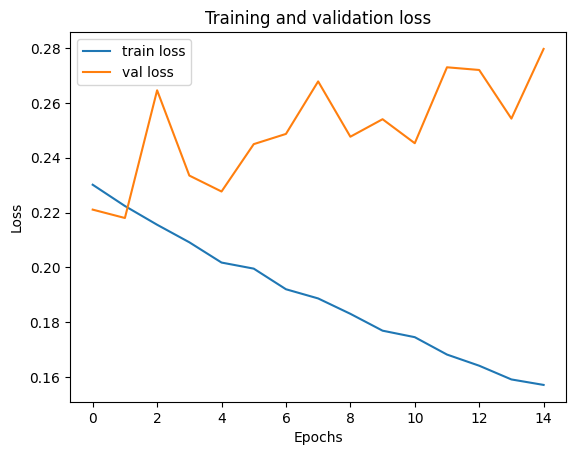

In [24]:

X_val=X_train[:5000]
y_val=y_train[:5000]
X_train=X_train[5000:]
y_train=y_train[5000:]

# Train the model
history=model.fit(X_train, y_train, epochs=15,validation_data=(X_val, y_val)) # epochs=5 means 5 times training

# plot the training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 📉 Loss Types in Machine Learning

- **Training Loss**: Error on the training dataset; used to update model weights during training.
- **Validation Loss**: Error on unseen validation data; monitors model's ability to generalize during training.
- **Test Loss**: Error on a separate test dataset; evaluates final model performance after training.
- **Overfitting**: Occurs when training loss decreases while validation loss increases, indicating the model is too tailored to training data.
- **Underfitting**: Both training and validation losses remain high, suggesting the model hasn't learned the data patterns effectively.


In [26]:

from tensorflow.keras import layers

from tensorflow.keras.callbacks import EarlyStopping

In [27]:
# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6617 - loss: 0.9155 - val_accuracy: 0.8401 - val_loss: 0.4553
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8481 - loss: 0.4268 - val_accuracy: 0.8521 - val_loss: 0.4213
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8626 - loss: 0.3771 - val_accuracy: 0.8680 - val_loss: 0.3736
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.8748 - loss: 0.3480 - val_accuracy: 0.8705 - val_loss: 0.3673
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8816 - loss: 0.3291 - val_accuracy: 0.8824 - val_loss: 0.3370
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8867 - loss: 0.3081 - val_accuracy: 0.8765 - val_loss: 0.3408
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8886 - loss: 0.3069 - val_accuracy: 0.8829 - val_loss: 0.3259
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 

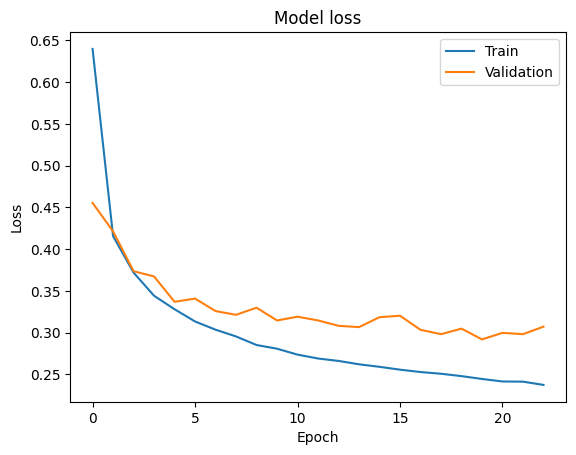

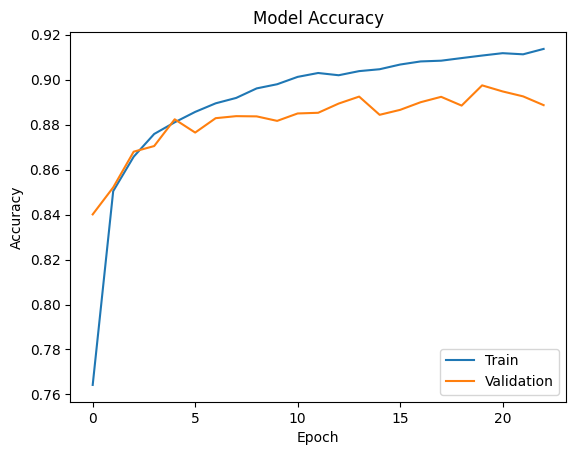

CPU times: total: 15min 51s
Wall time: 8min 39s


In [30]:
%%time
# Define the callback function
early_stopping = EarlyStopping(patience=3)

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

📌 What is Early Stopping?
Early stopping is a regularization technique used during training to prevent overfitting. It involves monitoring the model's performance on a validation set and halting training when the performance ceases to improve.

🧠 Why Use Early Stopping?
Overfitting Prevention: By stopping training at the optimal point, the model avoids learning noise from the training data.

Improved Generalization: The model maintains better performance on unseen data.

Efficient Training: Reduces unnecessary computation by avoiding overtraining.

⚙️ How Does It Work?
Monitor Validation Metric: Track a performance metric (e.g., validation loss) during training.

Set Patience: Define the number of epochs to wait for improvement.

Stop Training: If no improvement is observed within the patience period, halt training.

# Follow me 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/danishjmeo)

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/danish-javaid-4271a8231/)  